<a href="https://colab.research.google.com/github/Sln-19/Python/blob/main/Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import csv
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from calendar import month_name
import plotly.graph_objects as go
def read_data():
  '''
  Function to read csv file and store the data in python valid datatypes.
  No Input parameters
  Return Values:Nested List containg  data stored in the file
  '''
  with open("/content/gdrive/MyDrive/Data_visualization_foodsales.csv") as f:
      reader = csv.reader(f)
      header_row = next(reader)
      Quantity,Unit_price,Total_price,City,Category=[],[],[],[],[]
      for x in reader:
          Quantity.append(int(x[5]))
          Unit_price.append(float(x[6]))
          Total_price.append(float(x[7]))
          City.append(x[2])
          Category.append(x[3])
      lis=[Quantity,Unit_price,Total_price,City,Category]
  return lis

In [ ]:
bar_inp=read_data()

In [ ]:
def bar_plot(lis):
  """
  Function to Plot a Bar graph.
  Input Parameters:Nested List containg  data stored in the file
  Return Values:Bar plot, nested list containing the parameters to  which bar graph was plotted.
  """
  x=list(set(lis[-2]))       # x is list of all unique names of cities used in data
  y=[]
  #To find value of total sales corresponding to each city
  for i in x:
      sum=0
      j=lis[-2].index(i)
      while True:
          sum=sum+lis[-3][j]
          try: 
              j=lis[-2].index(i,j+1)
          except:
              y.append(sum)   # y is list of value of total sales corresponding to each city  
              break
  for i in range(len(y)):
      y[i]=round(y[i],2)
  fig, ax = plt.subplots()   
  ax.bar(x, y,color="cornflowerblue")
  for i in range(len(x)):
      plt.text(i,y[i],y[i],ha="center",va="bottom")
  plt.title("Total Sales in a city",fontsize=25,color="g")
  plt.xlabel("City",fontsize=18,color="g")
  plt.ylabel("Sales",fontsize=18,color="g")
  plt.figure(figsize=(15,35))
  plt.show()
  return [x,y]

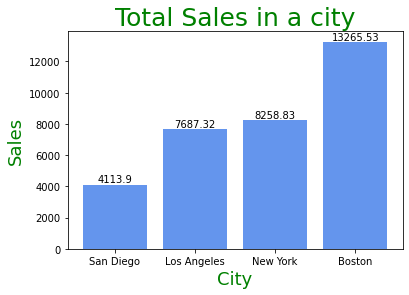

<Figure size 1080x2520 with 0 Axes>

In [ ]:
bar_output=bar_plot(bar_inp)

In [ ]:
def pie_plot(inp,bar_output):
  '''
  Function to plot pie chart
  Input Parameters: Nested List containg  data stored in the file and  nested list containing the parameters to  which bar graph was plotted
  Return Values: Pie chart
  '''
  #lis=[Quantity,Unit_price,Total_price,City,Category]=>inp
  #pos is the index of city in the list(nested list containing the parameters to  which bar graph was plotted) with max sales
  pos=bar_output[1].index(max(bar_output[1])) 
  city=bar_output[0][pos]
  category_list=list(set(inp[-1]))
  #To find list of total sales of different category of food in the city with max sales and store it in y.
  y=[]  
  for i in category_list:
      sum=0
      j=inp[-1].index(i)
      while True:
          if inp[-2][j]==city:
              sum=sum+inp[-3][j]
          try: 
              j=inp[-1].index(i,j+1)
          except:
              y.append(sum)
              break
  explode=[0 for i in range(len(category_list))]
  explode[y.index(max(y))]=0.1
  plt.title(f"Percentage distribution of \n Various Categories of food in {city}"
  ,fontsize=25,color="g")
  plt.pie(y,labels=category_list,radius=1,autopct='%0.2f%%',shadow=True,
  explode=explode)  
  plt.show()
  return

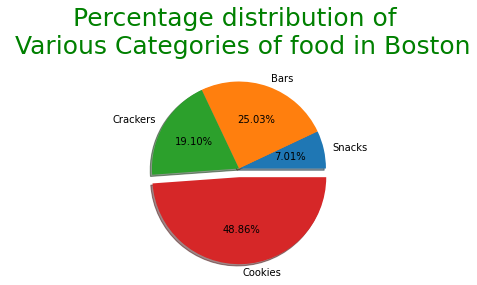

In [ ]:
pie_plot(bar_inp,bar_output) 

In [ ]:
'''
Demonstrating Plotly  and to sketch US Map
'''
import plotly.graph_objects as go
def map_plot(map_inp):
  '''
  Function to plot US Mapand represent the total sales on map
  Input parameters:Nested List containing list of city and total sales corresponding to each city.
  Return Value: US  Map with Hover text data 
  '''
  #Position is  a dictionary with city as key and its (latitude,longitude) tuple as value
  position={"New York":(40.730610, -73.935242),"Boston":(42.361145,-71.057083)
  ,"Los Angeles":(34.052235, -118.243683),"San Diego":(32.715736, -117.161087)}
  lats,lons=[],[]    #lats and lons corresponds to list of latitudes and longitudes
  for i in map_inp[0]:
      lats.append(position[i][0])
      lons.append(position[i][1])
  h_text=[]
  for i in range(len(map_inp[1])):
      h_text.append("Sales in "+str(map_inp[0][i])+f':${map_inp[1][i]}')
        
  data = [{'type': 'scattergeo','lon': lons,'lat': lats,'text':h_text,'marker'
  : { 'size': [15,15,15,15]}}]
  layout = dict(
  title = dict(text='Sales in different cities',font=dict(size=35,color='rgb(0.9,0.6,0.1)')),
  autosize = False,
  width = 1000,
  height = 500,
  )
  
  fig1 = go.Figure(data=data, layout=layout)
  fig1.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="brown",
    showsubunits=True, subunitcolor="olive")
    
  fig1.show()
  return

In [ ]:
map_plot(bar_output)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Data_visualization_foodsales.csv')
df_grouped = df.groupby('Product').sum()
df_grouped1 = df.groupby('Category').sum()
df_grouped2 = df.groupby('City').sum()
df_grouped3 = df.groupby('OrderDate').sum()
a = df_grouped.reset_index()
b = df_grouped1.reset_index()
c = df_grouped2.reset_index()
p = a['Product'].tolist()
q = a['Quantity'].tolist()
q1 = b['Quantity'].tolist()
p1 = b['Category'].tolist()
C = c['City'].tolist()
d = df.loc[:, ['Month', 'City', 'TotalPrice']]
line = d.groupby('Month').sum().reset_index()
tot = line['TotalPrice'].tolist()
TP = c['TotalPrice'].tolist()
month = line['Month'].tolist()
tot1 = [round(num, 2) for num in tot]
month1 = month[::2]
string = "/21"
month2 = [x + string for x in month1]

In [ ]:
def bar1(p, q):
  '''
  Function to demonstrate bar graph using pandas and matplotlib.
  input parameters-two lists which contain the data for the plot
  No return parameters
  '''
  fig, ax = plt.subplots(1, figsize=(16, 6))
  x = np.arange(len(p))
  i = 1
  j = 25
  for i in range(len(p)):
      plt.annotate(q[i], (-0.1 + i, q[i] + j))
  ax.set_ylabel('Quantity')
  ax.set_xlabel('Products')
  plt.xticks(x,p)
  plt.bar(x, df_grouped['Quantity'], width=0.6, color='Orange', label='Total')
  plt.title(f"Quantity of different products sold",fontsize=25,color="g")
  plt.legend()
  plt.show()
  return

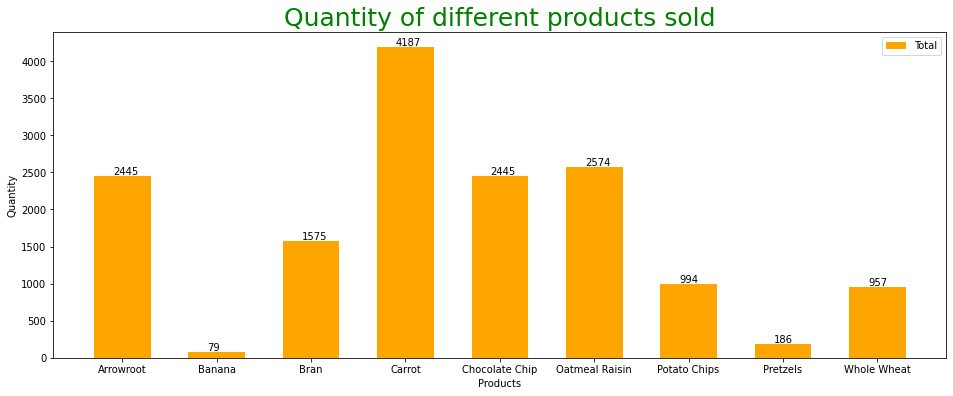

In [ ]:
bar1(p,q)

In [ ]:
def bar2(p1, q1):
        '''
        Function to demonstrate bar graph using pandas and matplotlib.
        input parameters-two lists which contain the data for the plot
        No return parameters
        '''
        fig, ax1 = plt.subplots(1, figsize=(16, 6))
        width = 0.3
        x = np.arange(len(p1))
        i = 10
        j = 25
        for i in range(len(p1)):
            plt.annotate(q1[i], (-0.1 + i, q1[i] + j))
        ax1.set_ylabel('Quantity')
        ax1.set_xlabel('Category')
        plt.xticks(x, p1)
        plt.bar(x, df_grouped1['Quantity'], width=0.4, color='Orange', label='Total')
        plt.title(f"Amount of products sold category wise",fontsize=25,color="g")
        plt.legend()
        plt.show()
        return

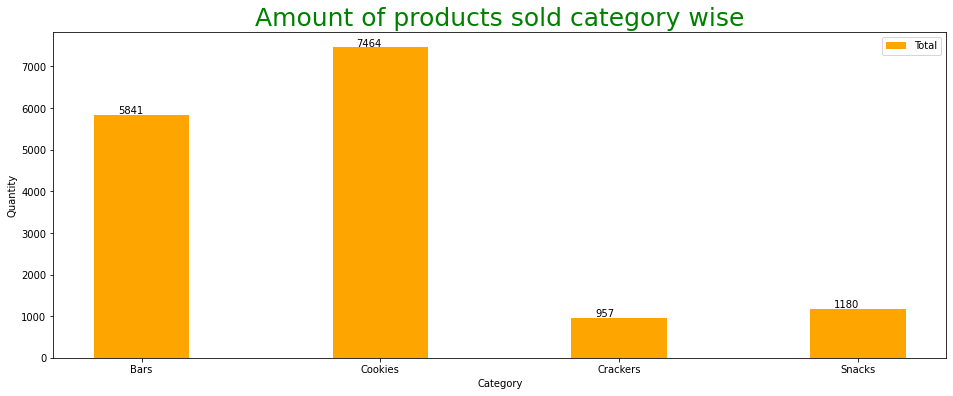

In [ ]:
bar2(p1,q1)

In [ ]:
def pie(C):
        '''
        Function to demonstrate pie chart using matplotlib.
        input parameters-A list which contain the data for the plot
        No return parameters
        '''
        fig, ax3 = plt.subplots()
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
        explode = (0.1, 0, 0, 0)  # explode 1st slice
        ax3.pie(TP, explode=explode, labels=C, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
        plt.axis('equal')
        plt.title(f"Percentage of sales in different cities",fontsize=25,color="g")
        plt.legend()
        plt.show()
        return

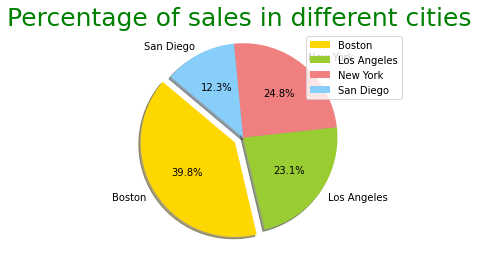

In [ ]:
pie(C)

In [ ]:
def line(tot1, month1, month2):
        '''
        Function to demonstrate line plot using matplotlib.
        input parameters-three lists which contain the data for the plot
        No return parameters
        '''
        fig, ax4 = plt.subplots(1,figsize=(20,10))
        odd_tot = []
        even_tot = []
        for i in range(0, len(tot1)):
            if i % 2:
                even_tot.append(tot1[i])
            else:
                odd_tot.append(tot1[i])

        x = np.arange(len(month2))
        i = 1
        j = 20
        for i in range(len(month2)):
            plt.annotate(odd_tot[i], (-0.1 + i, odd_tot[i] + j))

        for i in range(len(month2)):
            plt.annotate(even_tot[i], (-0.1 + i, even_tot[i] + j))
        ax4.set_ylabel('Sum of total price')
        ax4.set_xlabel('Months')
        ax4.set_xticks(x, month2)
        plt.plot(month1, odd_tot, label='2020')
        plt.plot(month1, even_tot, label='2021')
        plt.title(f"Sales during 2020-2021",fontsize=20,color="g")
        plt.legend()
        plt.show()
        return

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning:

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



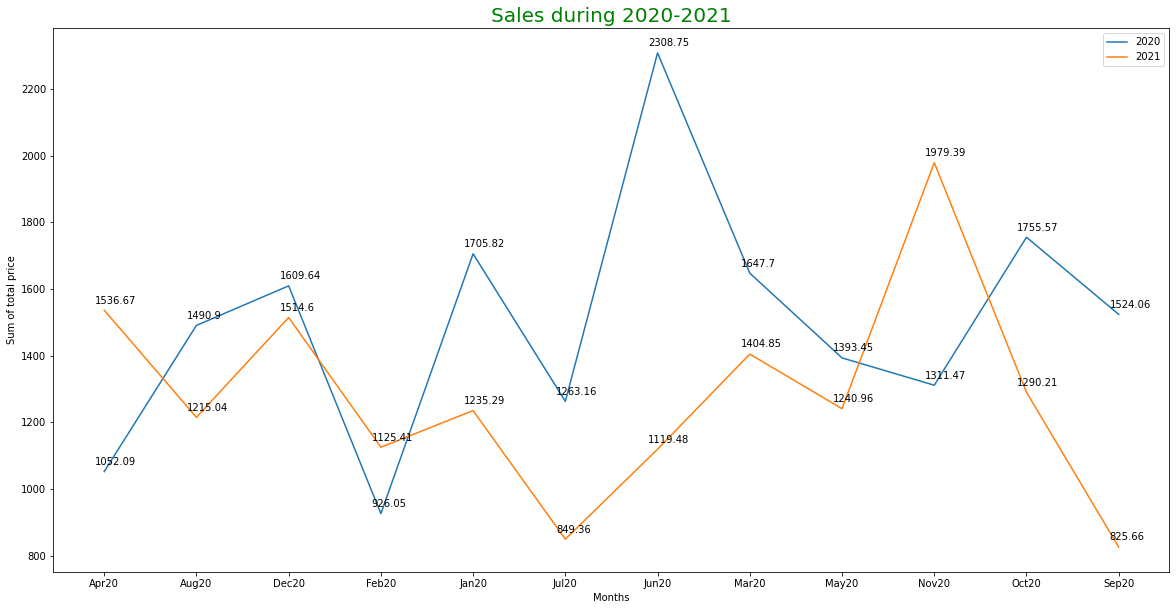

In [ ]:
line(tot1, month1, month2)